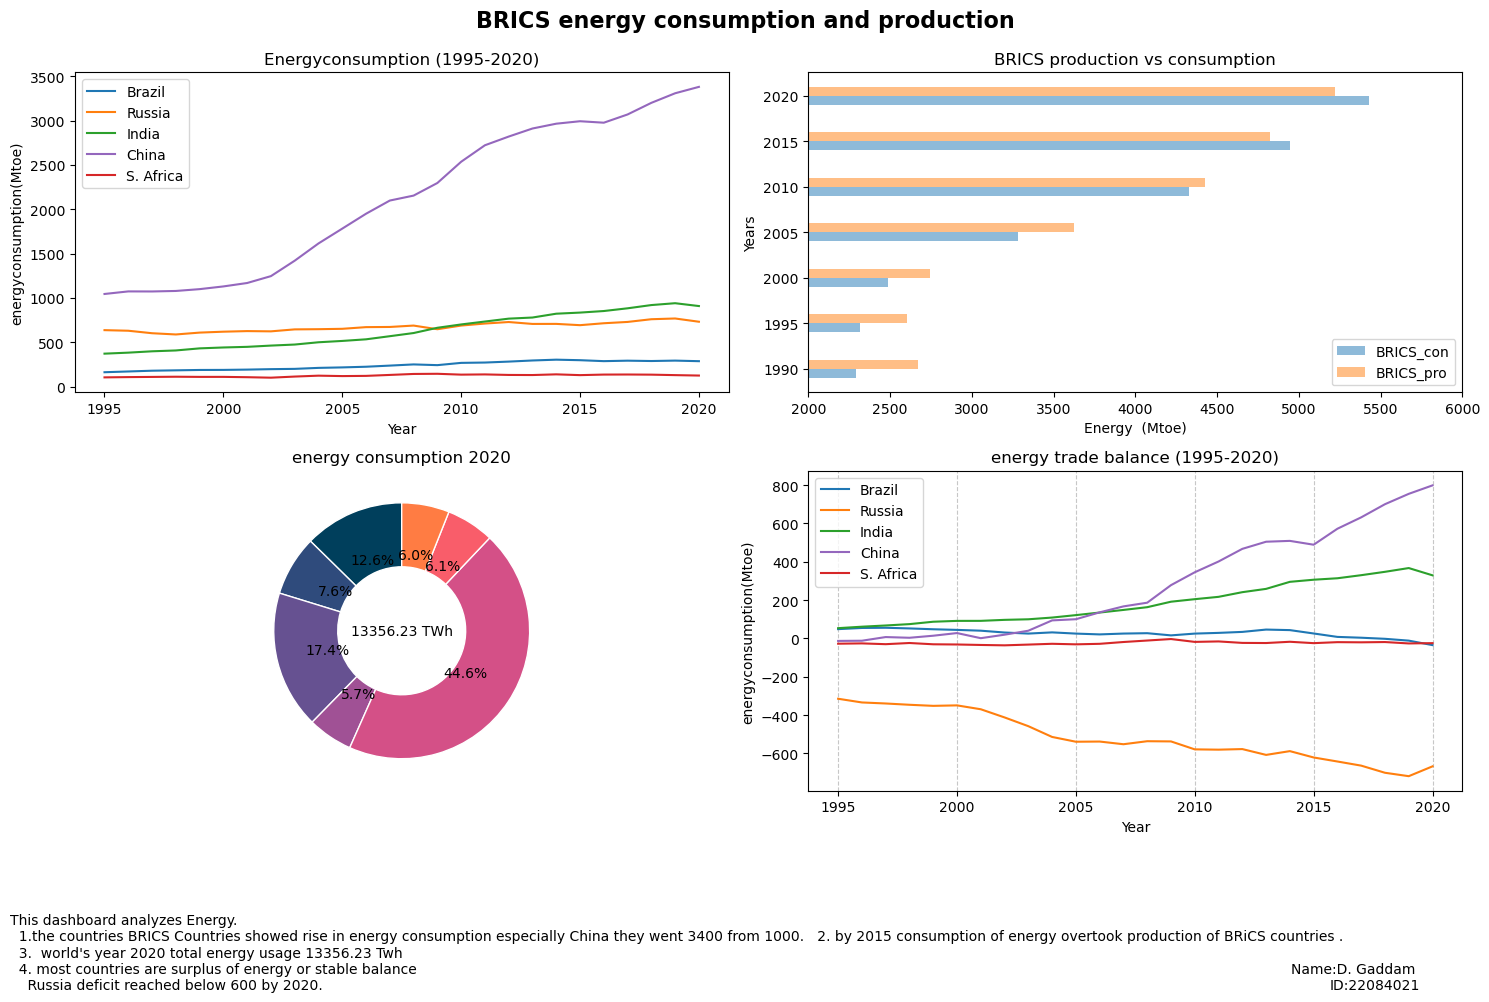

In [6]:
# Required libraries are imported: pandas for data handling, matplotlib for plotting, numpy for math operations.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Excel files are loaded into pandas DataFrames for analysis.
energy_consumption = pd.read_excel("totalenergyconsumption.xlsx")
energy_production = pd.read_excel("totalenergyproduction.xlsx")
trade_balance = pd.read_excel("tradebalance.xlsx")

def preprocess_data(dataset):
    # Re-index the dataset with 'country' and drop the original 'country' column.
    dataset.set_index(dataset['country'], inplace=True)
    return dataset.drop("country", axis=1)

# Preprocessing the data by setting the country as the index.
energy_consumption = preprocess_data(energy_consumption)
energy_production = preprocess_data(energy_production)
trade_balance = preprocess_data(trade_balance)

# A selection of years for data analysis.
years = [1990, 1995, 2000, 2005, 2010, 2015, 2020]

def retrieve_data(dataset, group):
    # Extract data for specific years and return as a list.
    return [dataset[group].loc[year] for year in years]

# Transposing datasets to facilitate easier data retrieval.
BRICS_consumption = retrieve_data(energy_consumption.T, "BRICS")
BRICS_production = retrieve_data(energy_production.T, "BRICS")

def plot_energy_consumption(ax, dataset):
    # Plotting energy consumption trends for BRICS countries.
    countries = ["Brazil", "Russia", "India", "China", "South Africa"]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728']
    for country, color in zip(countries, colors):
        ax.plot(dataset.loc[country, 1995:2020], color, label=country)
    ax.set_title('Energy Consumption (1995-2020)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Energy Consumption (Mtoe)')
    ax.legend()

def plot_comparison(ax, data1, data2):
    # Bar chart comparison between energy consumption and production.
    ax.barh([y - 0.5 for y in years], data1, height=0.5, label="Consumption", alpha=0.7)
    ax.barh([y + 0.5 for y in years], data2, height=0.5, label="Production", alpha=0.7)
    ax.set_xlabel('Energy (Mtoe)')
    ax.set_ylabel('Years')
    ax.set_title('BRICS Energy Production vs Consumption')
    ax.legend()

def plot_energy_distribution(ax, dataset):
    # Plotting a pie chart for energy consumption distribution by region in 2020.
    regions = ['Europe', 'CIS', 'North America', 'Latin America', 'Asia', 'Africa', 'Middle-East']
    consumption_data = [dataset.loc[region, 2020].round(2) for region in regions]
    color_palette = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43']
    ax.pie(consumption_data, labels=regions, colors=color_palette, autopct='%1.1f%%', startangle=90)
    ax.set_title("Energy Consumption by Region in 2020")

def plot_trade_balance(ax, dataset):
    # Time series plot for energy trade balance.
    ax.plot(dataset.loc["Brazil", 1995:2020], '#1f77b4', label='Brazil')  
    ax.plot(dataset.loc["Russia", 1995:2020], '#ff7f0e', label='Russia')  
    ax.plot(dataset.loc["India", 1995:2020], '#2ca02c', label='India')  
    ax.plot(dataset.loc["China", 1995:2020], '#9467bd', label='China')  
    ax.plot(dataset.loc["South Africa", 1995:2020], '#d62728', label='S. Africa')  

    ax.set_title('Energy Trade Balance (1995-2020)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Energy Trade Balance (Mtoe)')
    ax.legend()

# Master plotting function.
def create_dashboard(plot_indicator):
    if plot_indicator:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        plot_energy_consumption(axes[0, 0], energy_consumption)
        plot_comparison(axes[0, 1], BRICS_consumption, BRICS_production)
        plot_energy_distribution(axes[1, 0], energy_consumption)
        plot_trade_balance(axes[1, 1], trade_balance)

        # Constructing a narrative for the dashboard.
        narrative = "\nThis dashboard analyzes Energy.\n" \
            "  1.the countries BRICS Countries showed rise in energy consumption especially China they went 3400 from 1000. " \
            "  2. by 2015 consumption of energy overtook production of BRiCS countries .\n" \
            "  3.  world's year 2020 total energy usage 13356.23 Twh\n" \
            "  4. most countries are surplus of energy or stable balance \n    Russia deficit reached below 600 by 2020."
        
        author_info = "Compiled by: D. Gaddam\nID: 22084021"
        main_title = "Analysis of BRICS Energy Consumption and Production"

        # Add details and the narrative to the figure.
        fig.text(0.01, 0.01, narrative, va='bottom', fontsize=10)
        fig.text(0.95, 0.01, author_info, va='bottom', fontsize=10, ha='right')
        fig.suptitle(main_title, fontsize=16, y=0.99, fontweight='bold')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.savefig('22084021.png', dpi=300)
        # plt.show() #

create_dashboard(True)
